In [2]:
import numpy as np

# Importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.tools.jupyter import *
provider = IBMQ.load_account()

# For plotting
from qiskit.visualization import plot_histogram

In [3]:
def DJ_oracle(case,n):
    # Here we need to return a QuantumCircuit object
    # We have n+1 qubits in the circuit, n input and 1 output
    oracle_qc = QuantumCircuit(n+1)
    # Case 1, balanced oracle
    if case=='balanced':
        # We apply cnot for each qubit using the output qubit as target
        for qubit in range(n):
            oracle_qc.cnot(qubit,n)

    # Case 2, constant oracle
    if case=='constant':
        # First decide if constant value is 0 or 1
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # So that we can see when we display the circuit
    return oracle_gate

In [4]:
def DJ_algorithm(n, case = 'random'):
    # Create quantum circuit with n+1 qubits and n classical bits
    DJ_circuit = QuantumCircuit(n+1,n) 

    # Setup the input register 
    for qubit in range(n):
        DJ_circuit.h(qubit)

    # Setup the output qubit
    DJ_circuit.x(n)
    DJ_circuit.h(n)

    # Adding oracle to the quantum circuit
    if case=='random':
        choice = np.random.randint(2)
        if choice== 0:
            case = 'constant'
        else:
            case = 'balanced'
    
    oracle = DJ_oracle(case,n)
    DJ_circuit.append(oracle,range(n+1))

    # Perform H gates and measure
    for i in range(n):
        DJ_circuit.h(i)
        DJ_circuit.measure(i,i)

    return DJ_circuit

In [6]:
n = 4
DJ_circuit = DJ_algorithm(n)
DJ_circuit.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

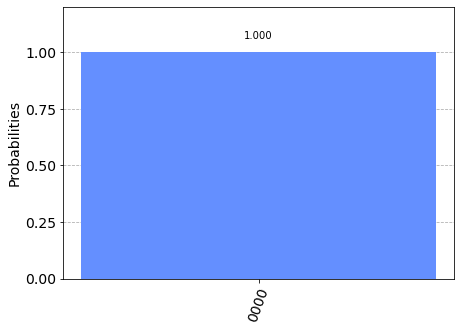

In [7]:
# Using the local simulator 
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
DJ_circuit = DJ_algorithm(n,'constant')
results = execute(DJ_circuit,backend=backend,shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [8]:
# Using IBM quantum experience we can do on actual quantum computer
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ",backend)
%qiskit_job_watcher
DJ_circuit = DJ_algorithm(n,'constant')
job = execute(DJ_circuit,backend=backend,shots=shots,optimization_level=3)


least busy backend:  ibmq_belem


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

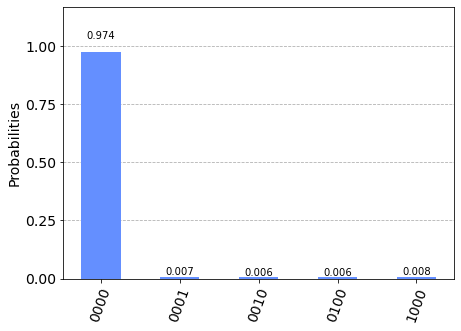

In [9]:
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

In [ ]:
# Jobs tried before
backend = provider.get_backend('ibmq_belem')
old_job = backend.retrieve_job('6353bf3f4934290b2b7343ef')
results = old_job.result()
answer = results.get_counts()
plot_histogram(answer)